In [1]:
import requests
from bs4 import BeautifulSoup

url="http://www.koeri.boun.edu.tr/scripts/lst2.asp"

sonuc=requests.get(url)
sonuc2=BeautifulSoup(sonuc.content,"lxml")
liste=[]
sonuc3=sonuc2.text
sonuc4=sonuc3.strip()
sonuc5=sonuc4.split("\r")

for i in range(14,len(sonuc5)-20):
    i=sonuc5[i].split()
    if(len(i)>=9):
        #f.write(i[0]+"  "+i[1]+"  "+i[2]+"  "+i[3]+" "+i[6]+"  "+i[7]+"  "+i[8]+" "+i[9]+"\n")
        if(not(i[9] in ["İlksel","ADALAR","ADASI","DENIZI","KORFEZI","REVIZE01","SINIR","SINIRI"] or ("-" in i[9]) )):
            liste.append([i[0],i[4],i[6],i[9].strip("()")])

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.DataFrame(liste,columns=["Tarih","Derinlik","Şiddet","İl"])

In [4]:
df.head(10)

,Tarih,Derinlik,Şiddet,İl
0,2020.02.01,10.2,1.9,MANISA
1,2020.02.01,5.0,1.8,ELAZIG
2,2020.02.01,15.7,2.1,MANISA
3,2020.02.01,0.0,1.6,BALIKESIR
4,2020.02.01,2.8,1.7,MANISA
5,2020.02.01,20.9,2.0,ELAZIG
6,2020.02.01,5.2,1.3,MANISA
7,2020.02.01,4.4,2.1,MANISA
8,2020.02.01,13.3,1.2,MANISA
9,2020.02.01,9.2,1.5,MANISA


In [5]:
df.tail(10)

,Tarih,Derinlik,Şiddet,İl
343,2020.01.30,5.4,2.2,MANISA
344,2020.01.30,2.4,3.0,MANISA
345,2020.01.30,10.6,2.5,MANISA
346,2020.01.30,7.0,2.1,ELAZIG
347,2020.01.30,7.9,2.4,MANISA
348,2020.01.30,5.0,1.6,MANISA
349,2020.01.30,15.1,2.0,MANISA
350,2020.01.30,5.4,2.1,KUTAHYA
351,2020.01.30,5.0,1.7,ERZURUM
352,2020.01.30,5.0,1.8,MANISA


In [6]:
df.dtypes

Tarih       object
Derinlik    object
Şiddet      object
İl          object
dtype: object

In [7]:
df["Derinlik"]=df["Derinlik"].astype(float)
df["Şiddet"]=df["Şiddet"].astype(float)

In [8]:
df.dtypes

Tarih        object
Derinlik    float64
Şiddet      float64
İl           object
dtype: object

In [9]:
df["İl"].value_counts()

MANISA        228
ELAZIG         55
MALATYA        31
MUGLA           8
IZMIR           4
BALIKESIR       3
DENIZLI         3
DIYARBAKIR      3
CANAKKALE       2
ADIYAMAN        2
ERZURUM         2
BURSA           2
ANKARA          2
VAN             2
SANLIURFA       1
KUTAHYA         1
ERZINCAN        1
ZONGULDAK       1
CORUM           1
ANTALYA         1
Name: İl, dtype: int64

In [10]:
df2=df["İl"].value_counts()

In [11]:
df2=pd.DataFrame(df2)

In [12]:
df2

,İl
MANISA,228
ELAZIG,55
MALATYA,31
MUGLA,8
IZMIR,4
BALIKESIR,3
DENIZLI,3
DIYARBAKIR,3
CANAKKALE,2
ADIYAMAN,2


In [13]:
sns.set_context("poster")
sns.set(rc={"figure.figsize":(23,3.)})
sns.set_style("whitegrid")

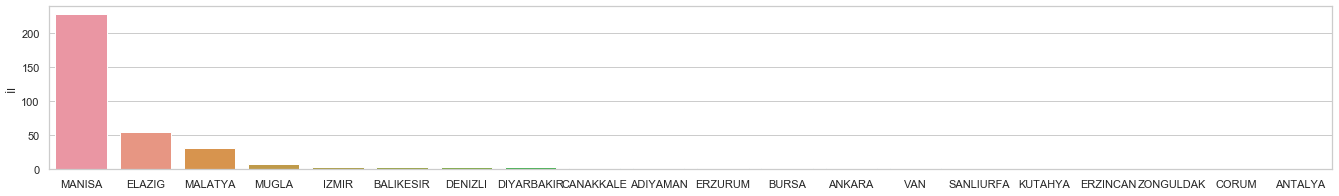

In [14]:
sns.barplot(x=df2.index,y=df2["İl"],data=df2)

In [15]:
dff=df.groupby("İl").mean()

In [16]:
dff.sort_values("Şiddet")[::-1]

,Derinlik,Şiddet
İl,,
VAN,7.450000,2.350000
MALATYA,6.722581,2.345161
ZONGULDAK,5.600000,2.300000
ELAZIG,8.841818,2.210909
KUTAHYA,5.400000,2.100000
ERZURUM,4.350000,2.100000
ERZINCAN,2.400000,1.900000
BURSA,8.100000,1.850000
MUGLA,3.850000,1.812500


In [17]:
dff["İl"]=dff.index
dff.index=[i for i in range(len(dff))]

In [18]:
dff

,Derinlik,Şiddet,İl
0,1.550000,1.800000,ADIYAMAN
1,11.300000,1.600000,ANKARA
2,13.300000,1.100000,ANTALYA
3,3.566667,1.600000,BALIKESIR
4,8.100000,1.850000,BURSA
5,4.800000,1.650000,CANAKKALE
6,7.300000,1.700000,CORUM
7,5.800000,1.700000,DENIZLI
8,9.466667,1.766667,DIYARBAKIR
9,8.841818,2.210909,ELAZIG


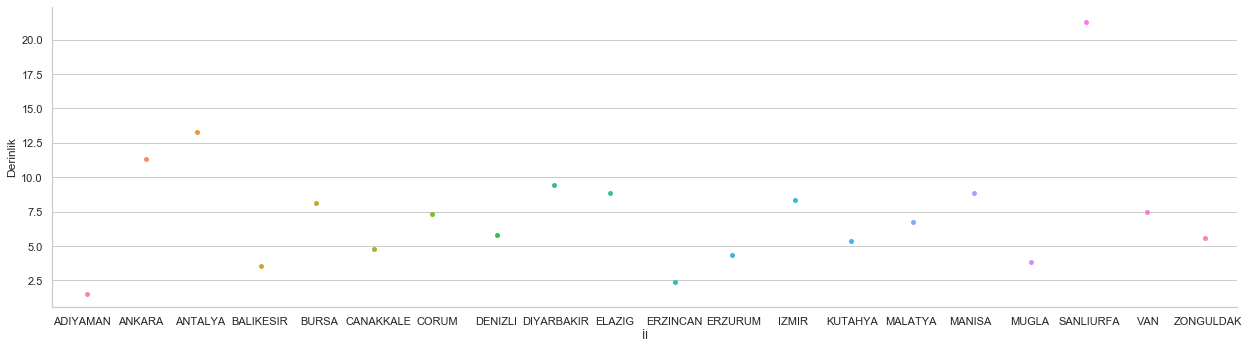

In [19]:
sns.catplot(x="İl",y="Derinlik",data=dff,aspect=3.5)

In [20]:
df.head(10)

,Tarih,Derinlik,Şiddet,İl
0,2020.02.01,10.2,1.9,MANISA
1,2020.02.01,5.0,1.8,ELAZIG
2,2020.02.01,15.7,2.1,MANISA
3,2020.02.01,0.0,1.6,BALIKESIR
4,2020.02.01,2.8,1.7,MANISA
5,2020.02.01,20.9,2.0,ELAZIG
6,2020.02.01,5.2,1.3,MANISA
7,2020.02.01,4.4,2.1,MANISA
8,2020.02.01,13.3,1.2,MANISA
9,2020.02.01,9.2,1.5,MANISA


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Derinlik,353.0,8.387252,5.915290,0.0,5.0,7.1,11.3,66.7
Şiddet,353.0,1.827479,0.552791,0.8,1.4,1.8,2.1,4.8


In [22]:
df2

,İl
MANISA,228
ELAZIG,55
MALATYA,31
MUGLA,8
IZMIR,4
BALIKESIR,3
DENIZLI,3
DIYARBAKIR,3
CANAKKALE,2
ADIYAMAN,2


In [23]:
import matplotlib.pyplot as plt

In [24]:
labels = df2.index[:10]
colors = ['grey','blue','red','yellow','green','brown',"black","orange","pink","black"]
sizes = df2["İl"][:10]

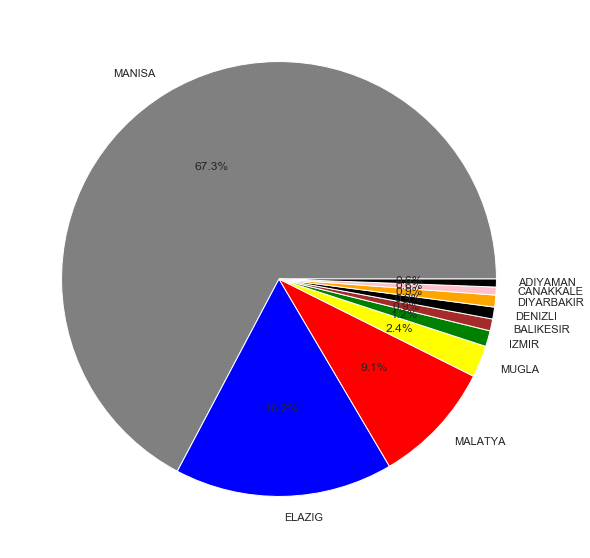

In [25]:
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels,explode=[0,0,0,0,0,0,0,0,0,0],colors=colors, autopct='%1.1f%%');

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Derinlik,353.0,8.387252,5.915290,0.0,5.0,7.1,11.3,66.7
Şiddet,353.0,1.827479,0.552791,0.8,1.4,1.8,2.1,4.8


In [27]:
df.head(3)

,Tarih,Derinlik,Şiddet,İl
0,2020.02.01,10.2,1.9,MANISA
1,2020.02.01,5.0,1.8,ELAZIG
2,2020.02.01,15.7,2.1,MANISA


In [28]:
df3=df["İl"][:10]

In [29]:
df3

0       MANISA
1       ELAZIG
2       MANISA
3    BALIKESIR
4       MANISA
5       ELAZIG
6       MANISA
7       MANISA
8       MANISA
9       MANISA
Name: İl, dtype: object

In [30]:
iller=list(df["İl"].value_counts()[:10].index)

In [31]:
iller

['MANISA',
 'ELAZIG',
 'MALATYA',
 'MUGLA',
 'IZMIR',
 'BALIKESIR',
 'DENIZLI',
 'DIYARBAKIR',
 'CANAKKALE',
 'ADIYAMAN']

In [32]:
df3=pd.DataFrame()

In [33]:
for i in (iller):
    df3 = df3.append(df[df["İl"]==i])

In [34]:
df3

,Tarih,Derinlik,Şiddet,İl
0,2020.02.01,10.2,1.9,MANISA
2,2020.02.01,15.7,2.1,MANISA
4,2020.02.01,2.8,1.7,MANISA
6,2020.02.01,5.2,1.3,MANISA
7,2020.02.01,4.4,2.1,MANISA
8,2020.02.01,13.3,1.2,MANISA
9,2020.02.01,9.2,1.5,MANISA
15,2020.02.01,10.3,1.4,MANISA
17,2020.02.01,3.8,1.8,MANISA
18,2020.02.01,12.1,1.4,MANISA


In [35]:
sns.set_context("paper")
sns.set(rc={"figure.figsize":(.16,.20)})
sns.set_style("whitegrid")

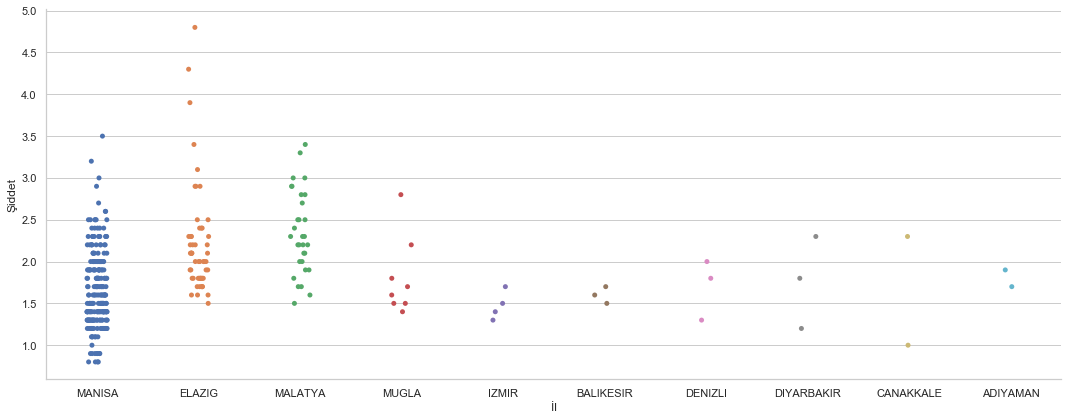

In [36]:
sns.catplot(x="İl",y="Şiddet",data=df3,aspect=2.5,height=6);

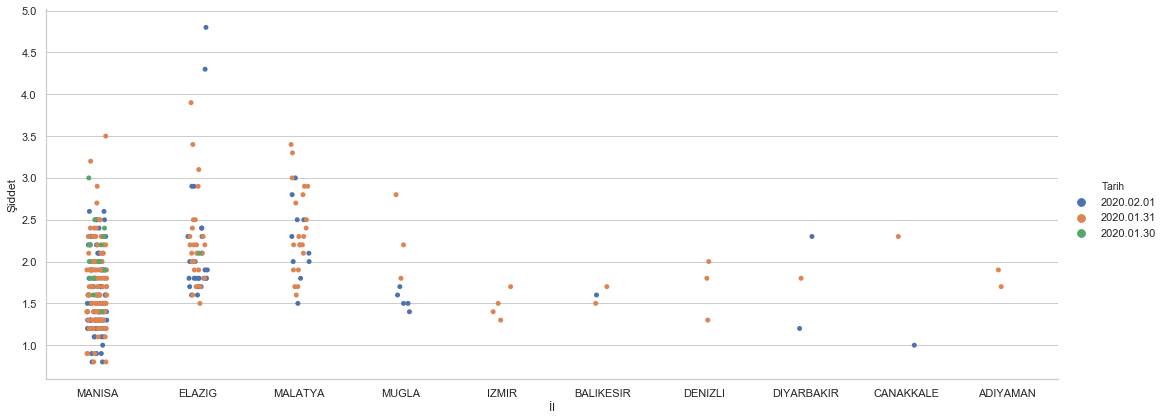

In [37]:
sns.catplot(x="İl",y="Şiddet",hue="Tarih",data=df3,aspect=2.5,height=6);

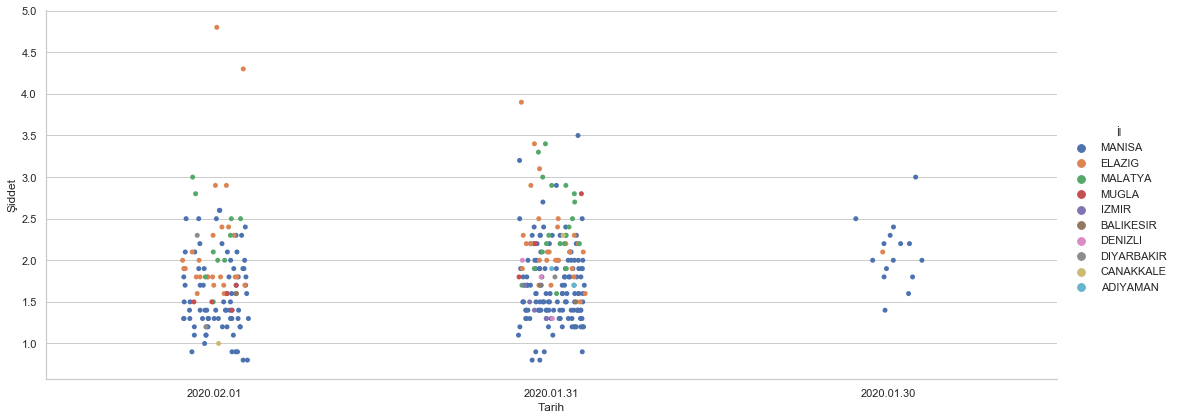

In [38]:
sns.catplot(x="Tarih",y="Şiddet",hue="İl",data=df3,aspect=2.5,height=6);

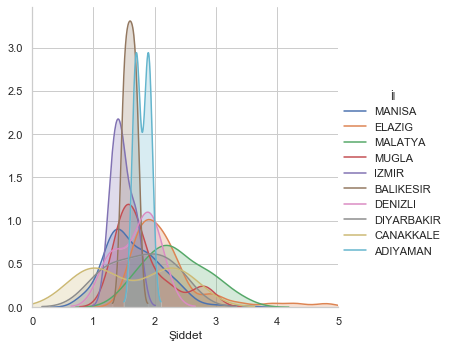

In [39]:
sns.FacetGrid(df3,hue="İl",height=5,xlim=(0,5)).map(sns.kdeplot,"Şiddet",shade=True).add_legend()

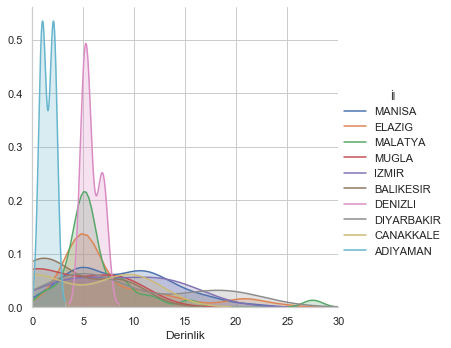

In [40]:
sns.FacetGrid(df3,hue="İl",height=5,xlim=(0,30)).map(sns.kdeplot,"Derinlik",shade=True).add_legend()

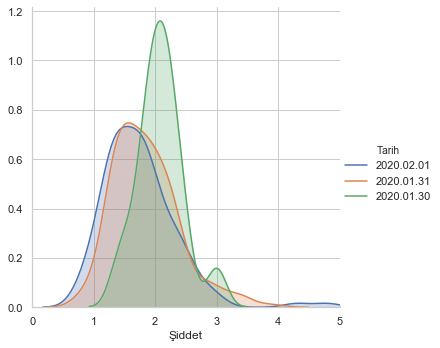

In [41]:
sns.FacetGrid(df3,hue="Tarih",height=5,xlim=(0,5)).map(sns.kdeplot,"Şiddet",shade=True).add_legend()

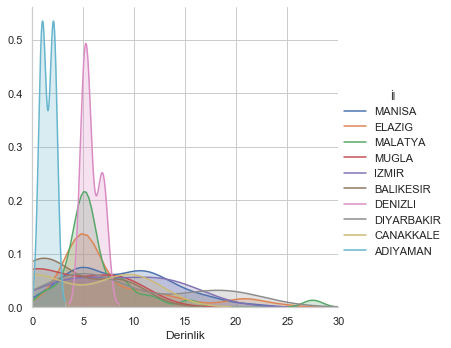

In [42]:
sns.FacetGrid(df3,hue="İl",height=5,xlim=(0,30)).map(sns.kdeplot,"Derinlik",shade=True).add_legend()

In [43]:
df3["Şiddet"].astype

<bound method NDFrame.astype of 0      1.9
2      2.1
4      1.7
6      1.3
7      2.1
8      1.2
9      1.5
15     1.4
17     1.8
18     1.4
19     1.4
22     1.7
23     1.8
24     1.3
26     2.0
27     1.7
28     1.3
29     1.2
33     2.2
35     1.4
36     1.4
37     1.4
38     2.3
39     1.2
40     2.6
41     1.3
42     1.3
45     1.1
47     2.3
48     1.5
      ... 
293    1.7
299    2.3
303    1.6
314    2.8
333    2.2
10     1.5
11     1.4
12     1.6
14     1.5
43     1.7
178    2.2
206    1.8
322    2.8
186    1.4
217    1.3
218    1.5
221    1.7
3      1.6
200    1.7
279    1.5
176    1.8
241    1.3
255    2.0
46     2.3
117    1.2
129    1.8
16     1.0
136    2.3
193    1.9
285    1.7
Name: Şiddet, Length: 339, dtype: float64>

In [44]:
df3.head()

,Tarih,Derinlik,Şiddet,İl
0,2020.02.01,10.2,1.9,MANISA
2,2020.02.01,15.7,2.1,MANISA
4,2020.02.01,2.8,1.7,MANISA
6,2020.02.01,5.2,1.3,MANISA
7,2020.02.01,4.4,2.1,MANISA


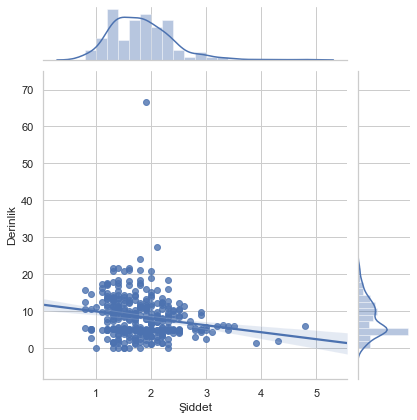

In [45]:
sns.jointplot(x="Şiddet",y="Derinlik",data=df3,kind="reg")

In [46]:
sns.set_context("poster")
sns.set(rc={"figure.figsize":(16,9.)})
sns.set_style("whitegrid")

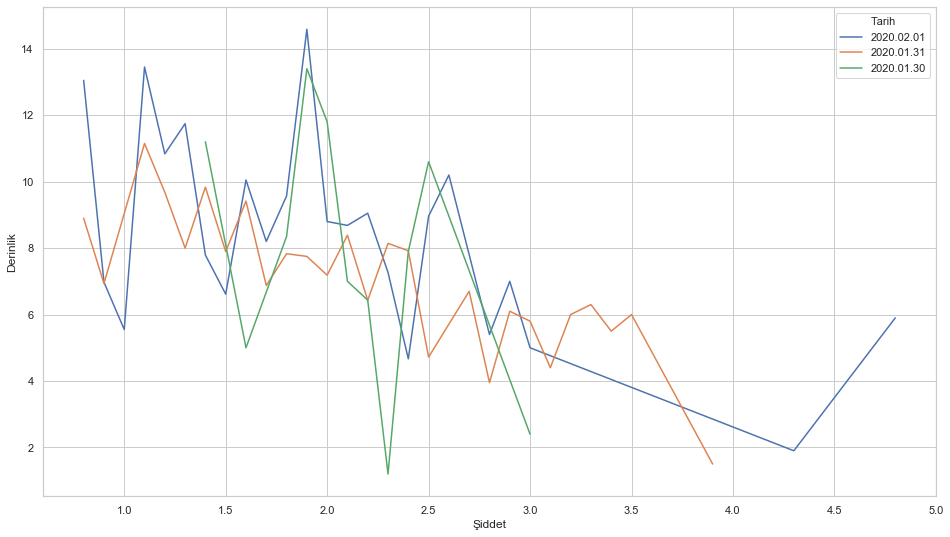

In [47]:
sns.lineplot(x="Şiddet",y="Derinlik",hue="Tarih",ci=None,data=df3)

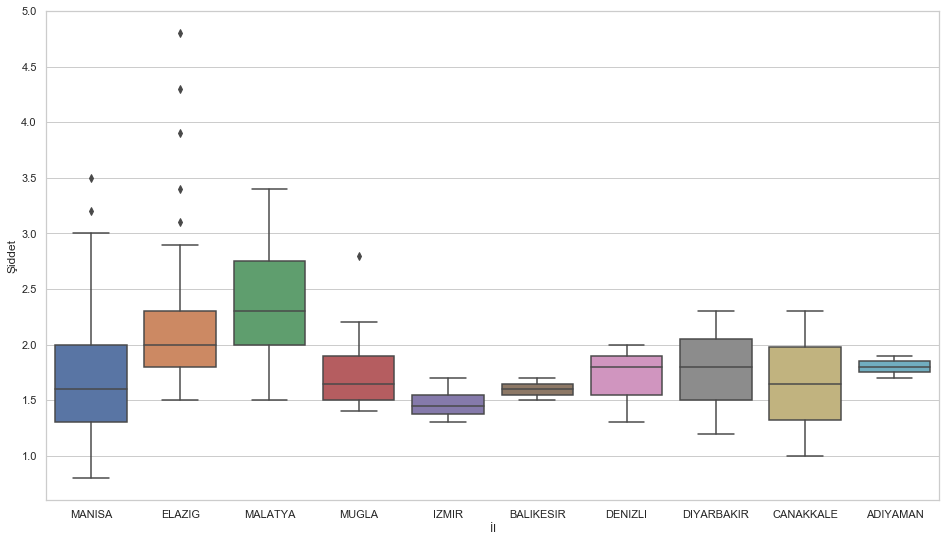

In [48]:
sns.boxplot(x="İl",y="Şiddet",data=df3)

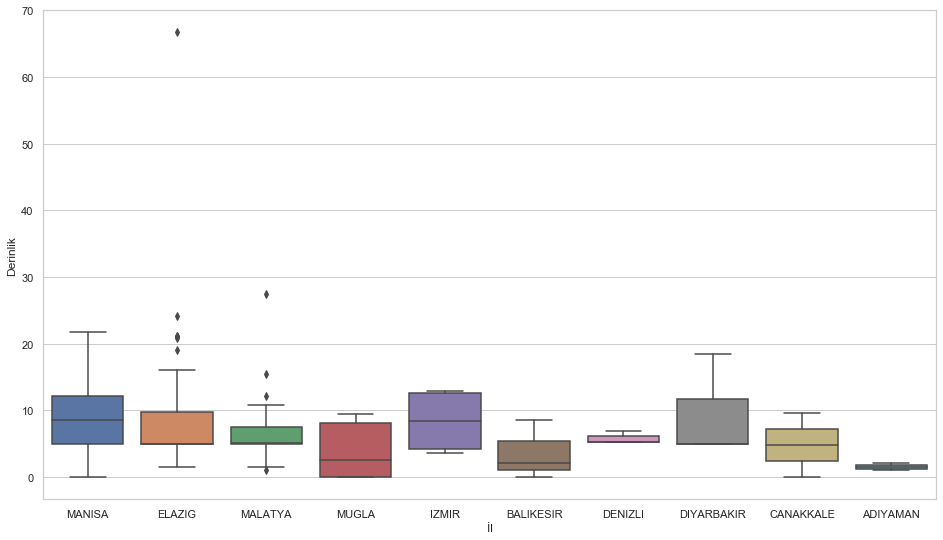

In [49]:
sns.boxplot(x="İl",y="Derinlik",data=df3)

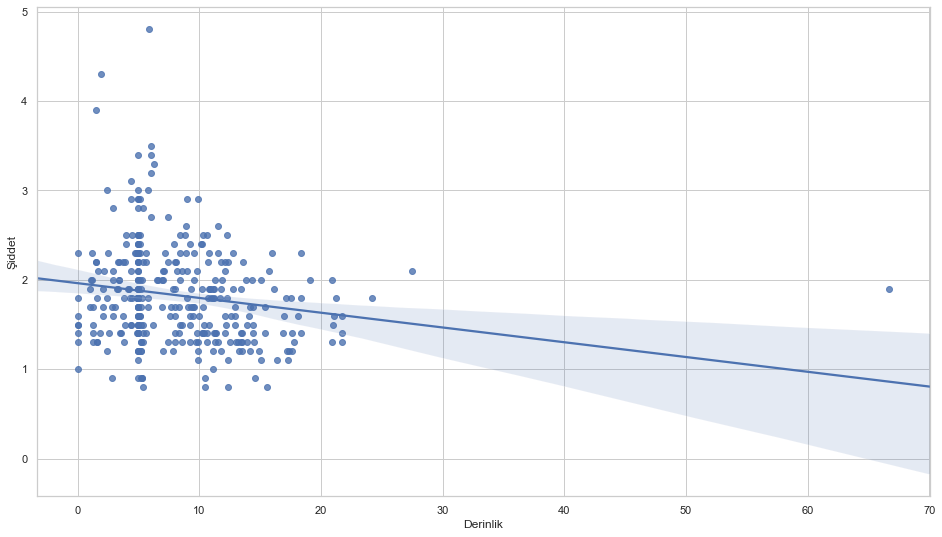

In [50]:
sns.regplot(x="Derinlik", y="Şiddet", data=df3);

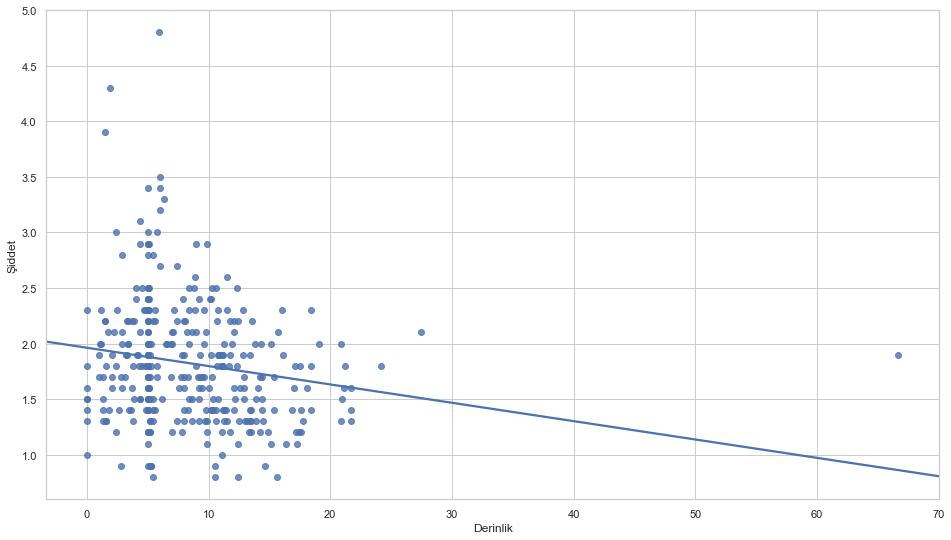

In [51]:
sns.regplot(x="Derinlik", y="Şiddet",ci=None,data=df3,scatter="Tarih");

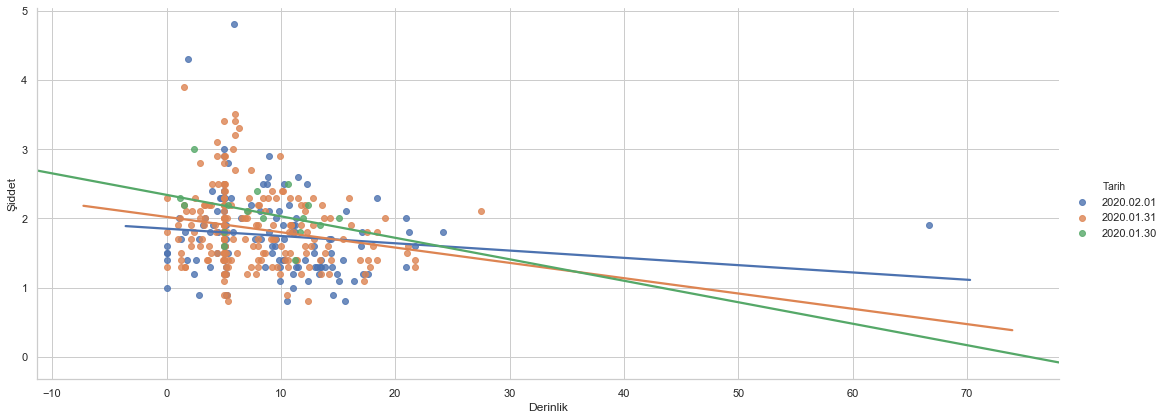

In [52]:
sns.lmplot(x="Derinlik", y="Şiddet",hue="Tarih",data=df3,aspect=2.5,height=6,ci=None);

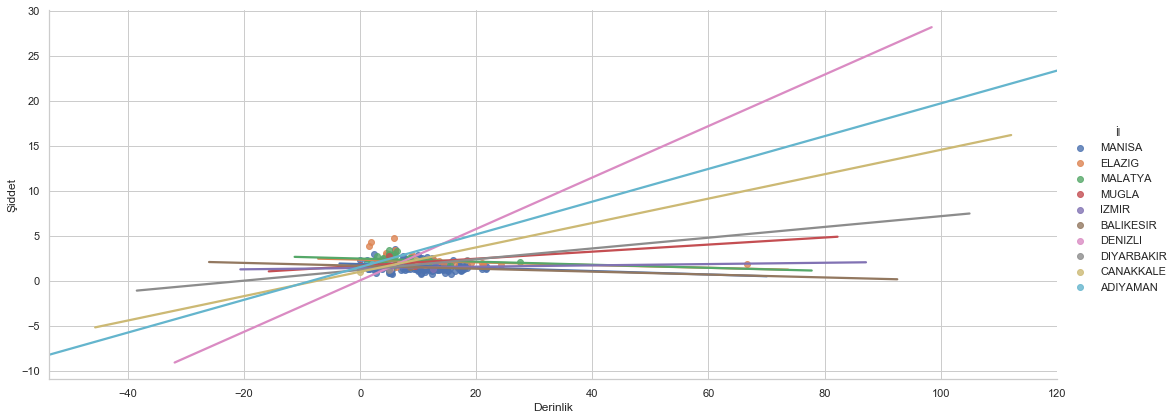

In [53]:
sns.lmplot(x="Derinlik", y="Şiddet",hue="İl",ci=None,data=df3,aspect=2.5,height=6);

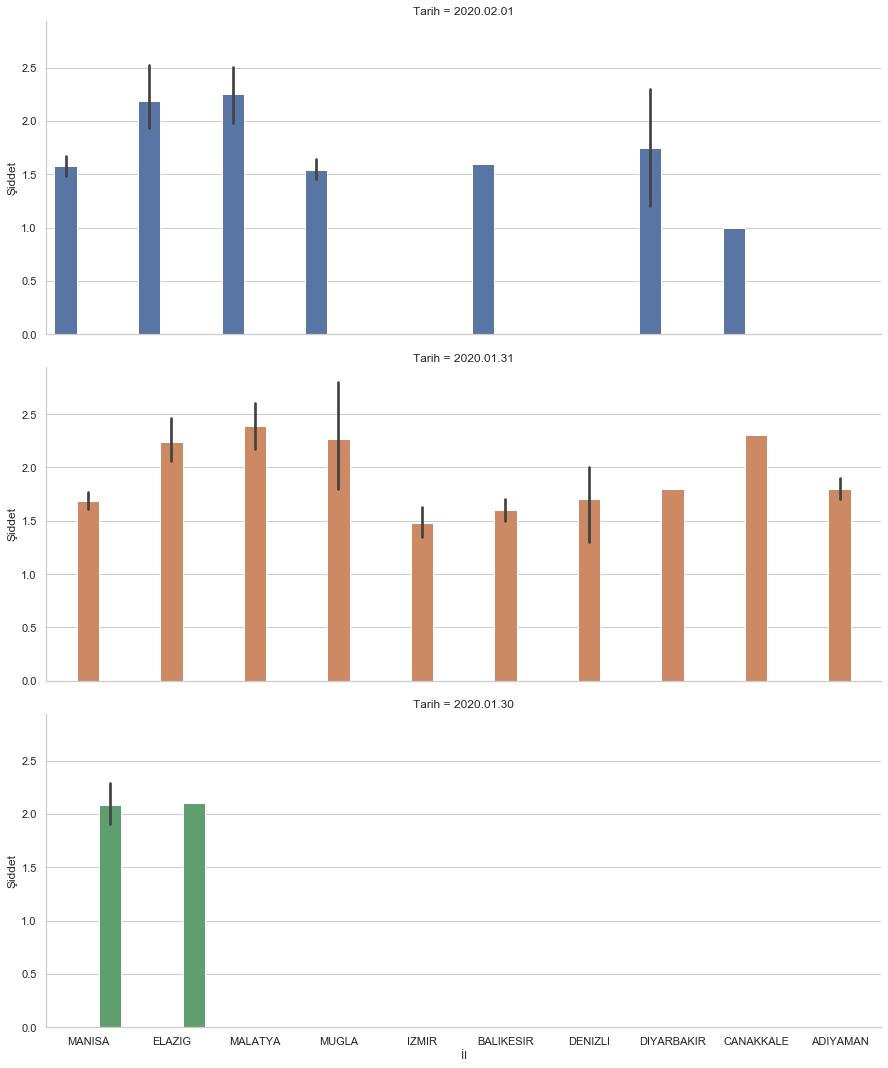

In [54]:
sns.catplot(x="İl", y="Şiddet", hue="Tarih", kind="bar", data=df3,aspect=2.5,row="Tarih");

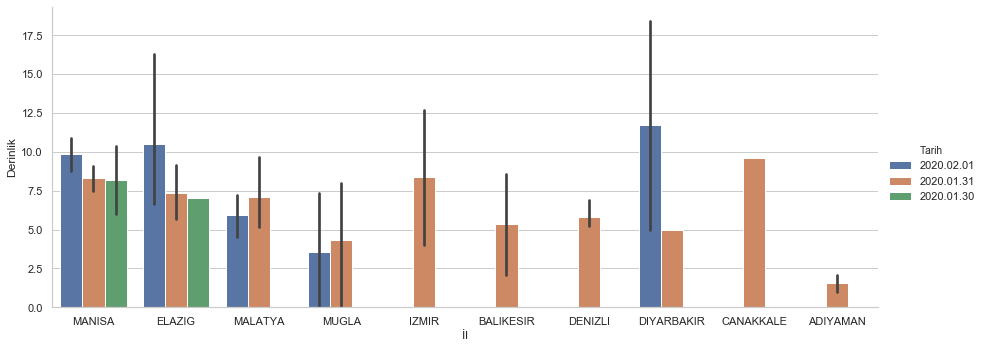

In [55]:
sns.catplot(x="İl", y="Derinlik", hue="Tarih", kind="bar", data=df3,aspect=2.5);

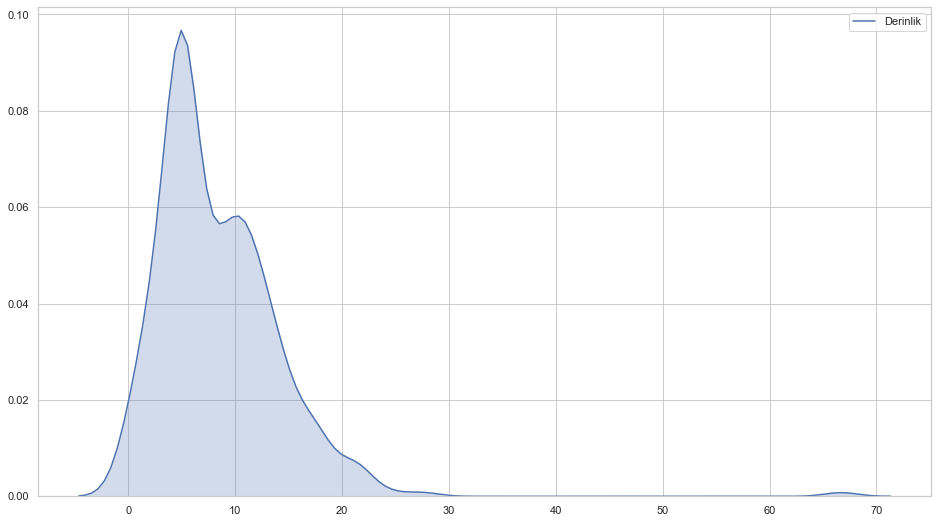

In [56]:
sns.kdeplot(df3["Derinlik"],shade=True)

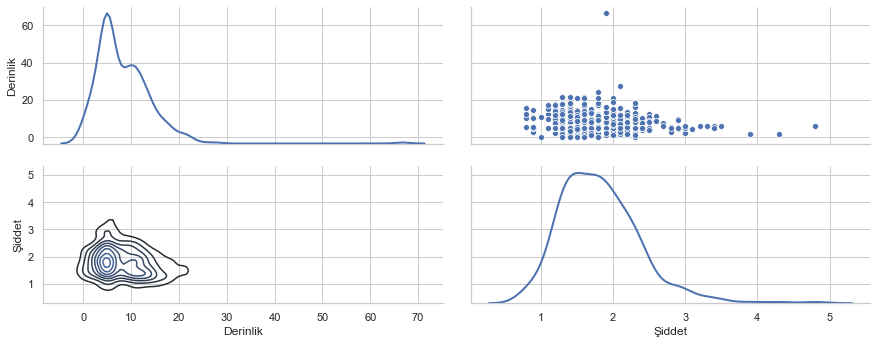

In [57]:
g = sns.PairGrid(df3, diag_sharey=False,aspect=2.5)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)